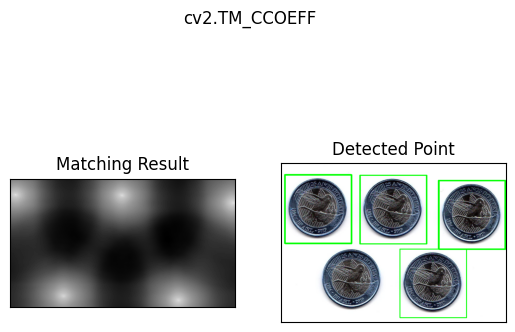

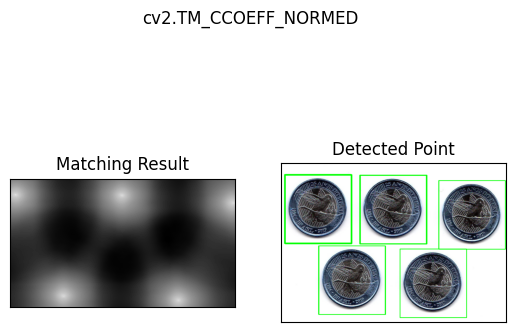

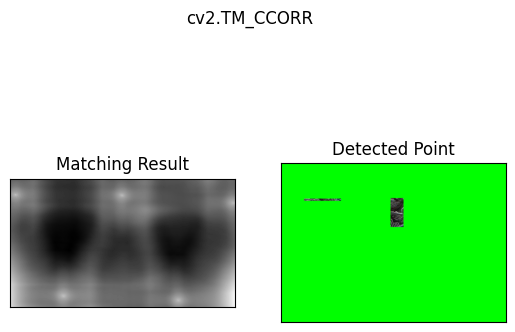

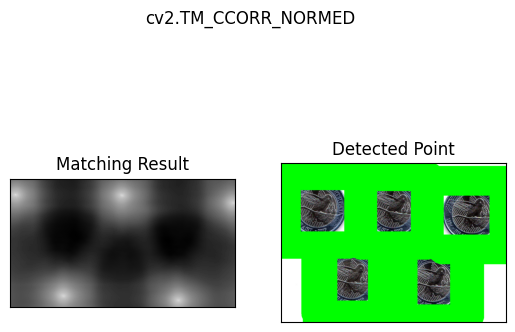

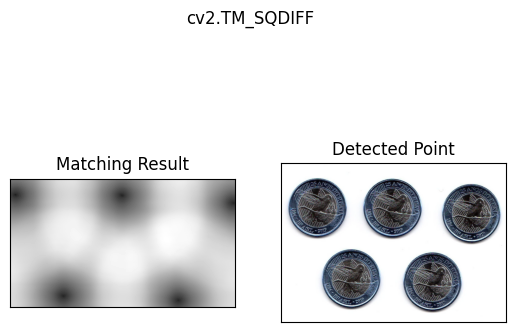

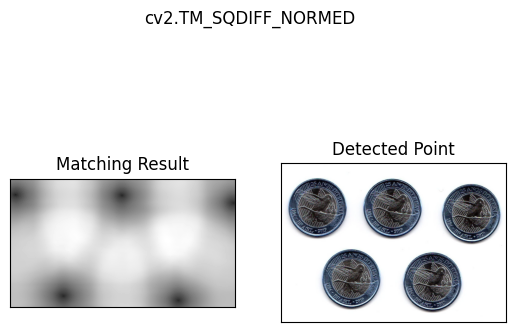

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem principal e o template
imagem = cv2.imread('images/moedas.webp')
template = cv2.imread('images/moedastemplate.png')

# Converte as imagens para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Obtém o tamanho do template
w, h = template_gray.shape[::-1]

# Lista dos métodos de template matching
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Itera sobre cada método de template matching
for method in methods:
    # Cria uma cópia da imagem para desenhar os retângulos de correspondência
    imagem_copy = imagem.copy()

    # Executa o template matching usando o método atual
    method_eval = eval(method)  # Converte a string do método para o valor real
    resultado = cv2.matchTemplate(imagem_gray, template_gray, method_eval)
    
    # Min/Max valores e localizações
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(resultado)
    
    # Para TM_SQDIFF e TM_SQDIFF_NORMED, valores mínimos indicam correspondência melhor
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        limiar = min_val
    else:
        limiar = max_val

    # Define um limiar relativo
    threshold = 0.8
    
    # Localiza as coordenadas onde o resultado é maior ou menor que o limiar (depende do método)
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        localizacoes = np.where(resultado <= threshold * limiar)
    else:
        localizacoes = np.where(resultado >= threshold * limiar)

    # Desenha retângulos ao redor de todas as correspondências encontradas
    for pt in zip(*localizacoes[::-1]):
        cv2.rectangle(imagem_copy, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    # Exibe a imagem com o método aplicado
    plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(imagem_copy,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

    plt.show()
